<a href="https://colab.research.google.com/github/Waleed-Azam/1D-CNN/blob/master/today%20meeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Prepare the nice data set

In [0]:
#   The data set contains 4 DVL beams, All the beams processed for the Underwater robot


In [0]:
#data set
#Expalnation of the data set
#Preprocessing of the data set
#Each beam Regression. estiamtion to conclude the best one
#Combining all and predcit some nice estiamtion

**Importing all the libraries for the CONV 1D CNN and Keras, Tensorflow**

In [0]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [0]:




!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Importing the data set**

In [0]:
downloaded = drive.CreateFile({'id':'11eCGs8j8V8bBFZBwT1nNvrGzdrQVmhWE'}) # replace the id with id of file you want to access'}) # replace the id with id of file you want to access
#https://drive.google.com/file/d/1agv3WTJF7GiaUwWJGDpDQfZwX_nApM-J/view?usp=sharing
#https://drive.google.com/file/d/14RfDnc5maSGzxripjhH3Z6B2asdpFbbX/view?usp=sharing
#https://drive.google.com/file/d/11eCGs8j8V8bBFZBwT1nNvrGzdrQVmhWE/view?usp=sharing
#DVL1______C_8000

In [0]:
downloaded.GetContentFile('DVL1______C_8000.csv')

In [79]:
import pandas as pd
df2 = pd.read_csv('DVL1______C_8000.csv') 
df2

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...,...,...,...,...
84986,8498.5,2.692643,1.8,2.620548,2.615895,2.692643,2.628101,2.620548,2.615895
84987,8498.6,2.692682,1.8,2.620243,2.615925,2.692682,2.629319,2.620243,2.615925
84988,8498.7,2.692715,1.8,2.619866,2.615951,2.692715,2.630637,2.619866,2.615951
84989,8498.8,2.692740,1.8,2.619450,2.615970,2.692740,2.631916,2.619450,2.615970


In [80]:
df2.head()

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
2,0.1,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
3,0.2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
4,0.3,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


In [81]:
df2.tail()

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4
84986,8498.5,2.692643,1.8,2.620548,2.615895,2.692643,2.628101,2.620548,2.615895
84987,8498.6,2.692682,1.8,2.620243,2.615925,2.692682,2.629319,2.620243,2.615925
84988,8498.7,2.692715,1.8,2.619866,2.615951,2.692715,2.630637,2.619866,2.615951
84989,8498.8,2.692740,1.8,2.619450,2.615970,2.692740,2.631916,2.619450,2.615970
84990,8498.9,2.692755,1.8,2.618994,2.615983,2.692755,2.633157,2.618994,2.615983


** The drone is moving with the velocity ranging betweeen -0.3 to +0.3 m/sec. There are also varaiation in the distance from the net also applied to make it more real and do-able**

In [0]:
#The data set, need to have more and more depth on the understandings

![Drone](https://drive.google.com/uc?id=1931F5ZEkIRkSjpM-XnVRtbXJCdYTkmr1)









**Removing the NaN values**

In [83]:
df2["Time"] = df2["Time"].fillna(0)
df2["DVL1"] = df2["DVL1"].fillna(0)
df2["DVL2"] = df2["DVL2"].fillna(0)
df2["DVL3"] = df2["DVL3"].fillna(0)
df2["DVL4"] = df2["DVL4"].fillna(0)
df2["DVL1_S"] = df2["DVL1_S"].fillna(0)
df2["DVL2_S"] = df2["DVL2_S"].fillna(0)
df2["DVL3_S"] = df2["DVL3_S"].fillna(0)
df2["DVL4_S"] = df2["DVL4_S"].fillna(0)
df2

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
2,0.1,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
3,0.2,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
4,0.3,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
...,...,...,...,...,...,...,...,...,...
84986,8498.5,2.692643,1.8,2.620548,2.615895,2.692643,2.628101,2.620548,2.615895
84987,8498.6,2.692682,1.8,2.620243,2.615925,2.692682,2.629319,2.620243,2.615925
84988,8498.7,2.692715,1.8,2.619866,2.615951,2.692715,2.630637,2.619866,2.615951
84989,8498.8,2.692740,1.8,2.619450,2.615970,2.692740,2.631916,2.619450,2.615970


In [0]:
t=df2['Time']
Tdata=df2['DVL1_S']
X=np.array(Tdata)
y=df2['DVL1']
y=np.array(y)
import numpy as np

In [85]:
X

array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [86]:
X.shape

(84991,)

In [0]:
def split_sequence(sequence, n_steps):
	X, z = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		z.append(seq_z)
	return array(X), array(z)

In [0]:
scaled_data=X

In [89]:
scaled_data.shape

(84991,)

In [90]:
scaled_data

array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [91]:
scaled_data.shape

(84991,)

In [92]:
X

array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [93]:
X.shape

(84991,)

In [0]:
# define input sequence
raw_seq = X
# choose a number of time steps
n_steps = 3
# split into samples
X, z = split_sequence(raw_seq, n_steps)

In [0]:
X, z = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [96]:
X

array([[[ 0.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ]],

       ...,

       [[ 2.692583],
        [ 2.692643],
        [ 2.692682]],

       [[ 2.692643],
        [ 2.692682],
        [ 2.692715]],

       [[ 2.692682],
        [ 2.692715],
        [ 2.69274 ]]])

In [97]:
X.shape

(84988, 3, 1)

In [98]:
X.shape[0]

84988

In [99]:
X.shape[1]

3

In [100]:
n_features

1

In [101]:
X.shape

(84988, 3, 1)

In [102]:
y

array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [103]:
z.shape

(84988,)

In [0]:
Label=y

In [105]:
Label.shape

(84991,)

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label.append(seq_x)
		y.append(seq_y)
	return array(Label), array(y)

In [0]:
raw_seq = Label
# choose a number of time steps
n_steps = 3
# split into samples
Label, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label = Label.reshape((Label.shape[0], Label.shape[1], n_features))

In [108]:
Label

array([[[ 0.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ]],

       [[20.      ],
        [20.      ],
        [20.      ]],

       ...,

       [[ 2.692583],
        [ 2.692643],
        [ 2.692682]],

       [[ 2.692643],
        [ 2.692682],
        [ 2.692715]],

       [[ 2.692682],
        [ 2.692715],
        [ 2.69274 ]]])

In [109]:
Label.shape

(84988, 3, 1)

In [110]:
y

array([20.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [111]:
y.shape

(84988,)

In [0]:
X_train  = np.array(X[:75000])
y_train = np.array(y[:75000])

X_test = np.array(X[-50000:])
y_test = np.array(y[-50000:])

In [113]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (75000, 3, 1)
y_train size: (75000,)
X_test size: (50000, 3, 1)
y_test size: (50000,)


In [0]:
dates = df2['Time']
train_date = dates[:75000]
test_date = dates[-50000:]

In [0]:
X = X_train
y = y_train

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
history=model.fit(X, y, epochs=2, verbose=0)

In [0]:
#Prediction 
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

In [119]:
len(y_pred)

50000

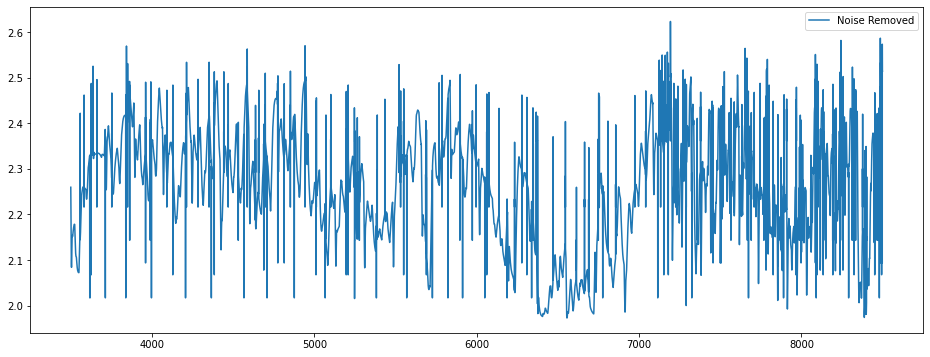

In [120]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [0]:
scaled_data_1=scaled_data[-50000:]

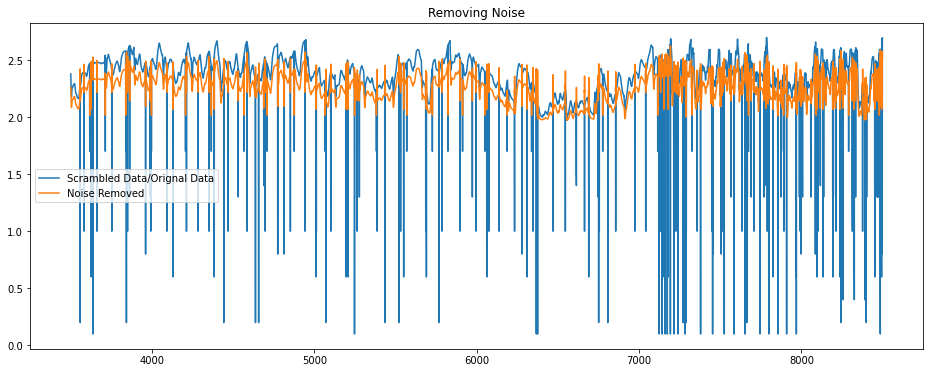

In [122]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

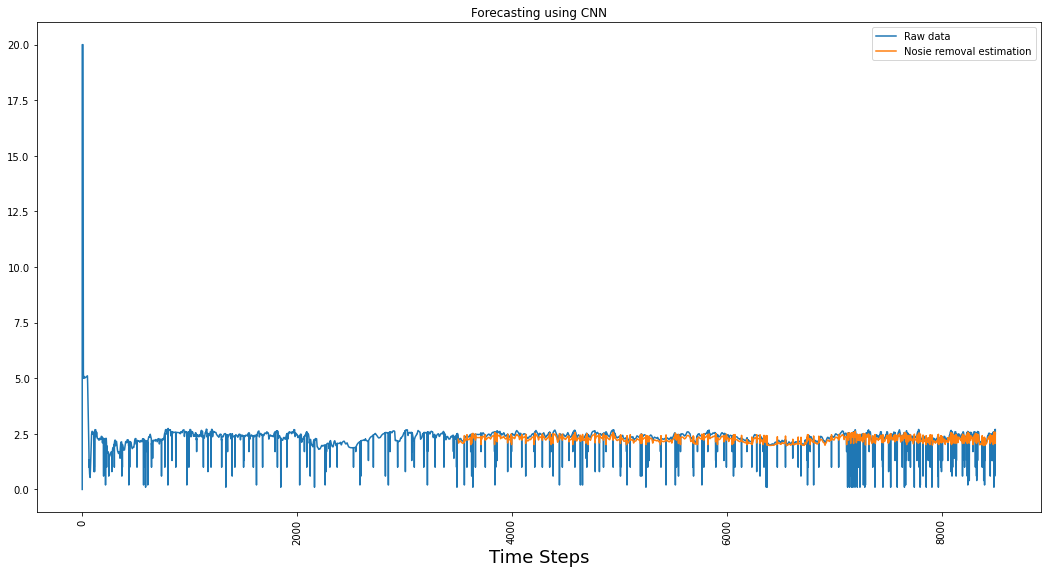

In [123]:
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data,label="Raw data")
plt.plot(test_date,y_pred,label="Nosie removal estimation")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

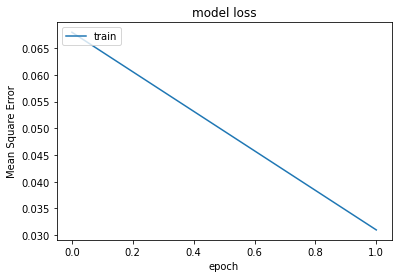

In [124]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
t=df2['Time']
T1data=df2['DVL2_S']
X1=np.array(T1data)
y1=df2['DVL2']
y1=np.array(y1)
import numpy as np

In [0]:
def split_sequence(sequence, n_steps):
	X1, z1 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z1 = sequence[i:end_ix], sequence[end_ix]
		X1.append(seq_x)
		z1.append(seq_z1)
	return array(X1), array(z1)

In [0]:
scaled_data1=X1

In [0]:
# define input sequence
raw_seq1 = X1
# choose a number of time steps
n_steps = 3
# split into samples
X1, z1 = split_sequence(raw_seq1, n_steps)

In [0]:
X1, z1 = split_sequence(raw_seq1, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X1 = X1.reshape((X1.shape[0], X1.shape[1], n_features))

In [130]:
X1.shape

(84988, 3, 1)

In [0]:
Label1=y1

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label1, y_1 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label1.append(seq_x)
		y_1.append(seq_y)
	return array(Label1), array(y_1)

In [133]:
y_1.shape

(84982, 3, 3, 1)

In [135]:
raw_seq1 = Label1
# choose a number of time steps
n_steps = 3
# split into samples
Label1, y_1 = split_sequence(raw_seq1, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label1 = Label1.reshape((Label1.shape[0], Label1.shape[1], n_features))

ValueError: ignored

In [0]:
X_train1  = np.array(X1[:75000])
y_train1 = np.array(y_1[:75000])

X_test1 = np.array(X1[-50000:])
y_test1 = np.array(y_1[-50000:])

In [0]:

print("X_train size: {}".format(X_train1.shape))
print("y_train size: {}".format(y_train1.shape))
print("X_test size: {}".format(X_test1.shape))
print("y_test size: {}".format(y_test1.shape))

In [0]:

dates = df2['Time']
train_date = dates[:75000]
test_date = dates[-50000:]

In [0]:
X1 = X_train1
y1 = y_train1

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
model.summary()

In [0]:
history=model.fit(X1, y1, epochs=1, verbose=0)

In [0]:
#Prediction 
# demonstrate prediction
import math
y_pred1=[]
for i in X_test1:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred1.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

In [0]:
len(y_pred1)

In [0]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred1,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [0]:
scaled_data1

In [0]:
scaled_data1_1=scaled_data1[-50000:]

In [0]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data1_1, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred1,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

In [0]:
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data1,label="Training")
plt.plot(test_date,y_pred1,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

In [0]:
t=df2['Time']
T12data=df2['DVL3_S']
X12=np.array(T12data)
y12=df2['DVL3']
y12=np.array(y12)
import numpy as np

In [0]:
def split_sequence(sequence, n_steps):
	X12, z12 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z1 = sequence[i:end_ix], sequence[end_ix]
		X12.append(seq_x)
		z12.append(seq_z1)
	return array(X12), array(z12)

In [0]:
scaled_data12=X12

In [0]:
# define input sequence
raw_seq12 = X12
# choose a number of time steps
n_steps = 3
# split into samples
X12, z12 = split_sequence(raw_seq12, n_steps)

In [0]:
X12, z12 = split_sequence(raw_seq12, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X12 = X12.reshape((X12.shape[0], X12.shape[1], n_features))

In [0]:
Label12=y12

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label12, y_12 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label12.append(seq_x)
		y_12.append(seq_y)
	return array(Label12), array(y_12)

In [0]:
raw_seq12 = Label12
# choose a number of time steps
n_steps = 3
# split into samples
Label12, y_12 = split_sequence(raw_seq12, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label12 = Label12.reshape((Label12.shape[0], Label12.shape[1], n_features))

In [0]:
X_train12  = np.array(X12[:75000])
y_train12 = np.array(y_12[:75000])

X_test12 = np.array(X12[-50000:])
y_test12 = np.array(y_12[-50000:])

In [0]:
print("X_train2 size: {}".format(X_train12.shape))
print("y_train2 size: {}".format(y_train12.shape))
print("X_test2 size: {}".format(X_test12.shape))
print("y_test2 size: {}".format(y_test12.shape))

In [0]:
dates = df2['Time']
train_date = dates[:75000]
test_date = dates[-50000:]

In [0]:
X2 = X_train12
y2 = y_train12

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
history=model.fit(X2, y2, epochs=1, verbose=0)

In [0]:
#Prediction 
# demonstrate prediction
import math
y_pred2=[]
for i in X_test12:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred2.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

In [0]:
len(y_pred2)

In [0]:
len(y_test12)

In [0]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred2,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [0]:
scaled_data12

In [0]:
scaled_data1_2=scaled_data12[-50000:]

In [0]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data1_2, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred2,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

In [0]:
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data12,label="Training")
plt.plot(test_date,y_pred2,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

In [0]:
t=df2['Time']
T13data=df2['DVL4_S']
X13=np.array(T13data)
y13=df2['DVL4']
y13=np.array(y13)
import numpy as np

In [0]:
def split_sequence(sequence, n_steps):
	X13, z13 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z12 = sequence[i:end_ix], sequence[end_ix]
		X13.append(seq_x)
		z13.append(seq_z12)
	return array(X13), array(z13)

In [0]:
scaled_data13=X13

In [0]:
# define input sequence
raw_seq13 = X13
# choose a number of time steps
n_steps = 3
# split into samples
X13, z13 = split_sequence(raw_seq13, n_steps)

In [0]:
X13, z13 = split_sequence(raw_seq13, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X13 = X13.reshape((X13.shape[0], X13.shape[1], n_features))

In [0]:
Label13=y13

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label13, y_13 = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label13.append(seq_x)
		y_13.append(seq_y)
	return array(Label13), array(y_13)

In [0]:
raw_seq13 = Label13
# choose a number of time steps
n_steps = 3
# split into samples
Label13, y_13 = split_sequence(raw_seq13, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label13 = Label13.reshape((Label13.shape[0], Label13.shape[1], n_features))

In [0]:
y_13

In [0]:
X_train13  = np.array(X13[:75000])
y_train13 = np.array(y_13[:50000])

X_test13 = np.array(X13[-75000:])
y_test13 = np.array(y_13[-50000:])

In [0]:
print("X_train3 size: {}".format(X_train13.shape))
print("y_train3 size: {}".format(y_train13.shape))
print("X_test3 size: {}".format(X_test13.shape))
print("y_test3 size: {}".format(y_test13.shape))

In [0]:
dates = df2['Time']
train_date = dates[:75000]
test_date = dates[-50000:]

In [0]:
X3 = X_train13
y3 = y_train13

In [0]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [0]:
history=model.fit(X3, y3, epochs=1, verbose=0)

In [0]:
#Prediction 
# demonstrate prediction
import math
y_pred3=[]
for i in X_test13:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred3.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

In [0]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred3,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [0]:
scaled_data13

In [0]:
scaled_data13_2=scaled_data13[-50000:]

In [0]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data13_2, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred3,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

In [0]:
plt.figure(figsize = (18,9))

plt.plot(dates,scaled_data13,label="Training")
plt.plot(test_date,y_pred3,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()